The purpose of this notebook is trying to answer the following questions:
* Total Cases/Deaths per state and over time
* Daily Cases/Deaths over time
* Mortality Rate per state and over time

In [27]:
library(stats)
library(dplyr)
library(ggplot2)
library(repr)
library(mgcv)
library(scales)

In [2]:
options(repr.plot.width=15, repr.plot.height=8)

In [3]:
#load in dataset
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
df <- read.csv(file = url)
head(df, 10)

,date,county,state,fips,cases,deaths
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,2020-01-21,Snohomish,Washington,53061,1,0
2,2020-01-22,Snohomish,Washington,53061,1,0
3,2020-01-23,Snohomish,Washington,53061,1,0
4,2020-01-24,Cook,Illinois,17031,1,0
5,2020-01-24,Snohomish,Washington,53061,1,0
6,2020-01-25,Orange,California,6059,1,0
7,2020-01-25,Cook,Illinois,17031,1,0
8,2020-01-25,Snohomish,Washington,53061,1,0
9,2020-01-26,Maricopa,Arizona,4013,1,0


# Clean Data

In [4]:
#drop fips column
df = subset(df, select = -c(fips))
head(df,10)
str(df)

,date,county,state,cases,deaths
,<chr>,<chr>,<chr>,<int>,<int>
1,2020-01-21,Snohomish,Washington,1,0
2,2020-01-22,Snohomish,Washington,1,0
3,2020-01-23,Snohomish,Washington,1,0
4,2020-01-24,Cook,Illinois,1,0
5,2020-01-24,Snohomish,Washington,1,0
6,2020-01-25,Orange,California,1,0
7,2020-01-25,Cook,Illinois,1,0
8,2020-01-25,Snohomish,Washington,1,0
9,2020-01-26,Maricopa,Arizona,1,0


'data.frame':	764735 obs. of  5 variables:
 $ date  : chr  "2020-01-21" "2020-01-22" "2020-01-23" "2020-01-24" ...
 $ county: chr  "Snohomish" "Snohomish" "Snohomish" "Cook" ...
 $ state : chr  "Washington" "Washington" "Washington" "Illinois" ...
 $ cases : int  1 1 1 1 1 1 1 1 1 1 ...
 $ deaths: int  0 0 0 0 0 0 0 0 0 0 ...


In [5]:
#Convert CHR into Date
df$date <- as.Date(df$date , format = "%Y-%m-%d")
str(df)

'data.frame':	764735 obs. of  5 variables:
 $ date  : Date, format: "2020-01-21" "2020-01-22" ...
 $ county: chr  "Snohomish" "Snohomish" "Snohomish" "Cook" ...
 $ state : chr  "Washington" "Washington" "Washington" "Illinois" ...
 $ cases : int  1 1 1 1 1 1 1 1 1 1 ...
 $ deaths: int  0 0 0 0 0 0 0 0 0 0 ...


In [6]:
#check for NA
sum(is.na(df))

[1] 0

# Analyze Data

## Total cases / Total deaths

In [7]:
#ignore warnings
options(dplyr.summarise.inform = FALSE)

In [8]:
#Total Cases
total_cases <- df %>% 
  group_by(date) %>% 
  summarise(total_cases = sum(cases))
tail(total_cases, 1)

date,total_cases
<date>,<int>
2020-11-24,12669898


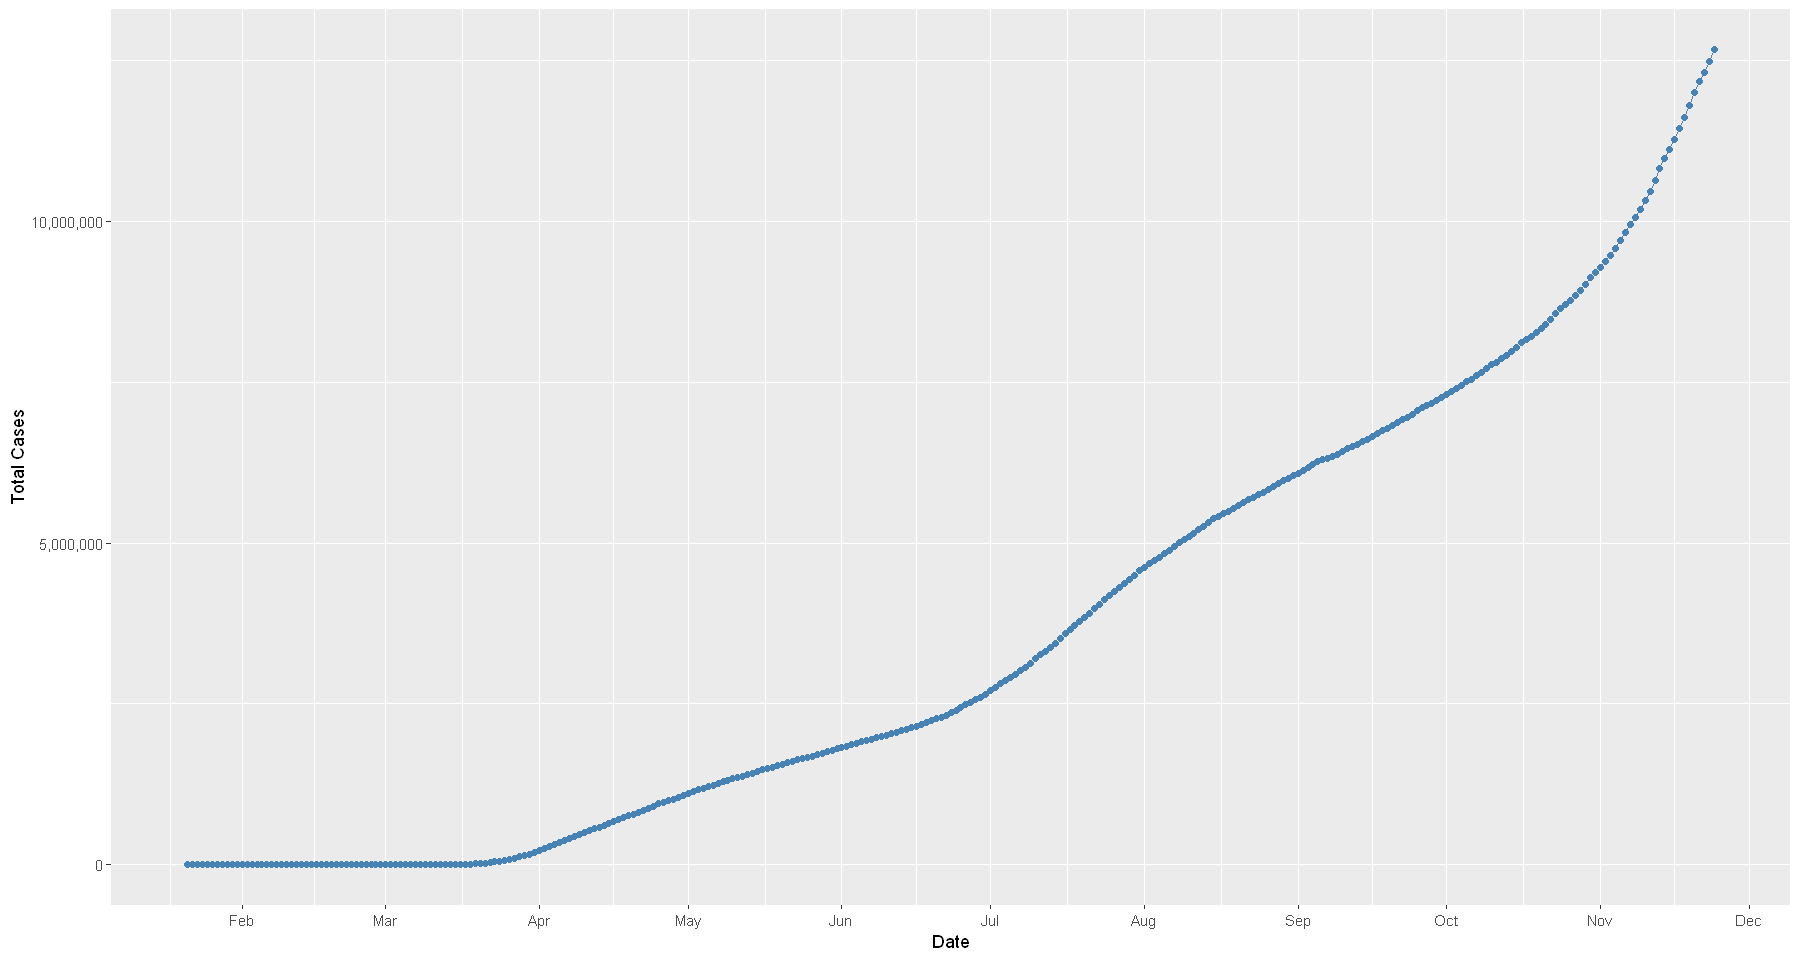

In [9]:
#Plot Total Cases
ggplot(data=total_cases, aes(x=date, y=total_cases))+geom_line(color="steelblue")+geom_point(color="steelblue")+labs(y= "Total Cases", x = "Date")+scale_x_date(date_breaks = "months", date_labels="%b")+scale_y_continuous(labels = comma)

In [10]:
#Total Deaths
total_deaths <- df %>% 
  group_by(date) %>% 
  summarise(total_deaths =sum(deaths))

tail(total_deaths, 1)

date,total_deaths
<date>,<int>
2020-11-24,258807


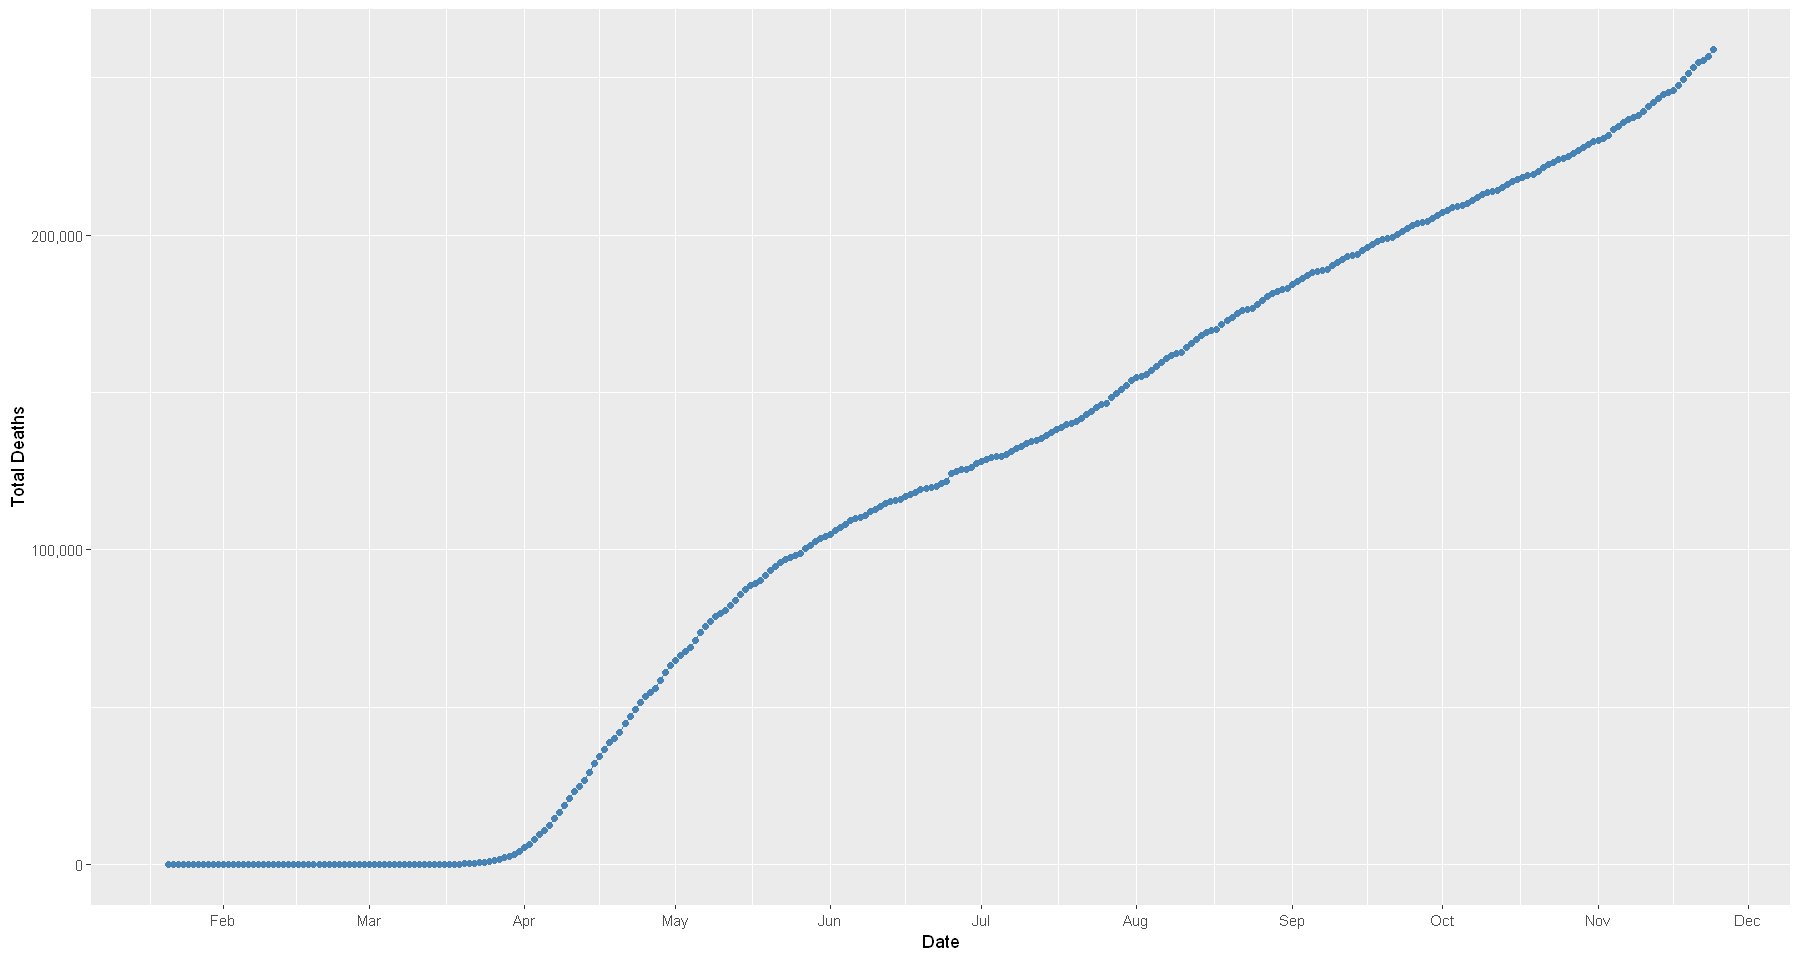

In [11]:
#Plot Total Deaths
ggplot(data=total_deaths, aes(x=date, y=total_deaths))+geom_line(color="steelblue")+geom_point(color='steelblue')+labs(y= "Total Deaths", x = "Date")+scale_x_date(date_breaks = "months", date_labels="%b")+scale_y_continuous(labels = comma)

## Total cases per state (Top 10)

In [12]:
#Total cases per state
newest_date <- max(df$date)
cases_per_state <- df %>% 
    filter(date==newest_date) %>% 
    group_by(state) %>% 
    summarise(total_cases = sum(cases)) %>% 
    arrange(desc(total_cases))
cases_per_state_10 <- head(cases_per_state,10)
cases_per_state_10

state,total_cases
<chr>,<int>
Texas,1204194
California,1153005
Florida,953292
Illinois,675543
New York,611756
Georgia,438441
Wisconsin,386441
Ohio,371908
Michigan,347076


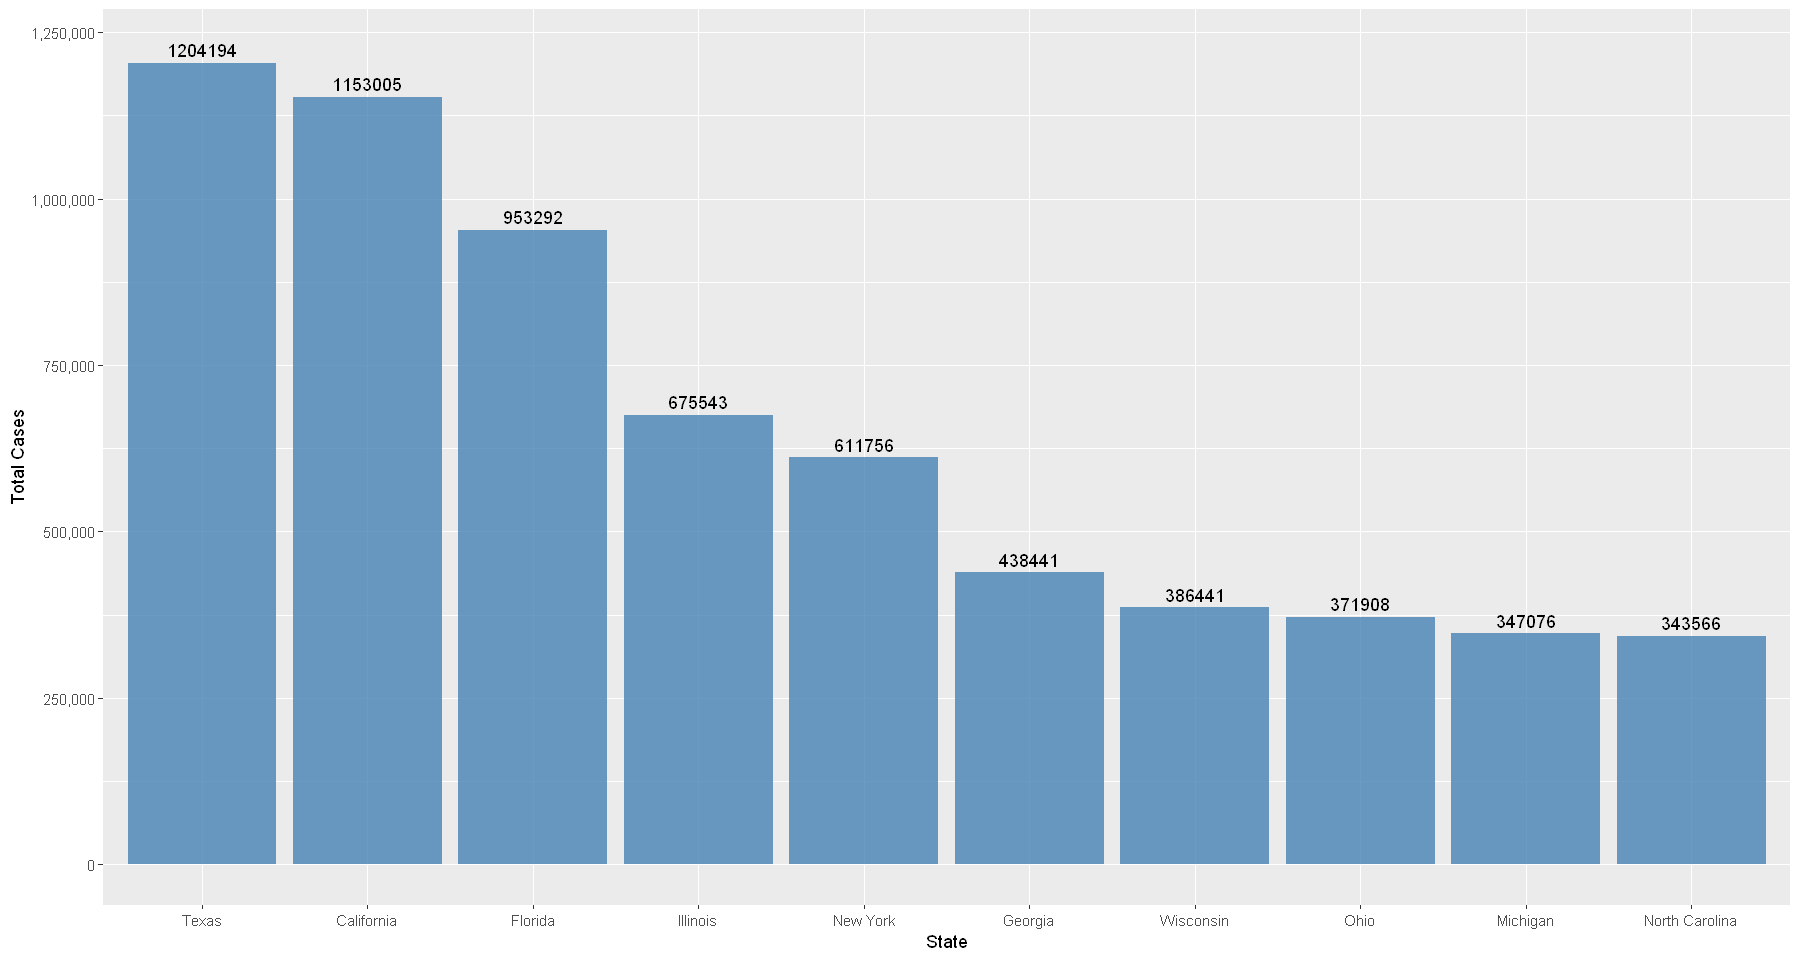

In [13]:
ggplot(data=cases_per_state_10, aes(x=reorder(state, -total_cases), y=total_cases))+geom_bar(fill="steelblue", stat='identity', alpha=0.8)+geom_text(aes(label=total_cases), nudge_y=20000)+labs(y= "Total Cases", x = "State")+scale_y_continuous(labels = comma)

## Total deaths per state (Top 10)

In [14]:
#Total deaths per state
deaths_per_state <- df %>% 
    filter(date==newest_date) %>% 
    group_by(state) %>% 
    summarise(total_deaths = sum(deaths)) %>% 
    arrange(desc(total_deaths))
deaths_per_state_10 <- head(deaths_per_state,10)
deaths_per_state_10

state,total_deaths
<chr>,<int>
New York,33847
Texas,21338
California,18875
Florida,18156
New Jersey,16819
Illinois,12294
Massachusetts,10551
Pennsylvania,10014
Michigan,9094


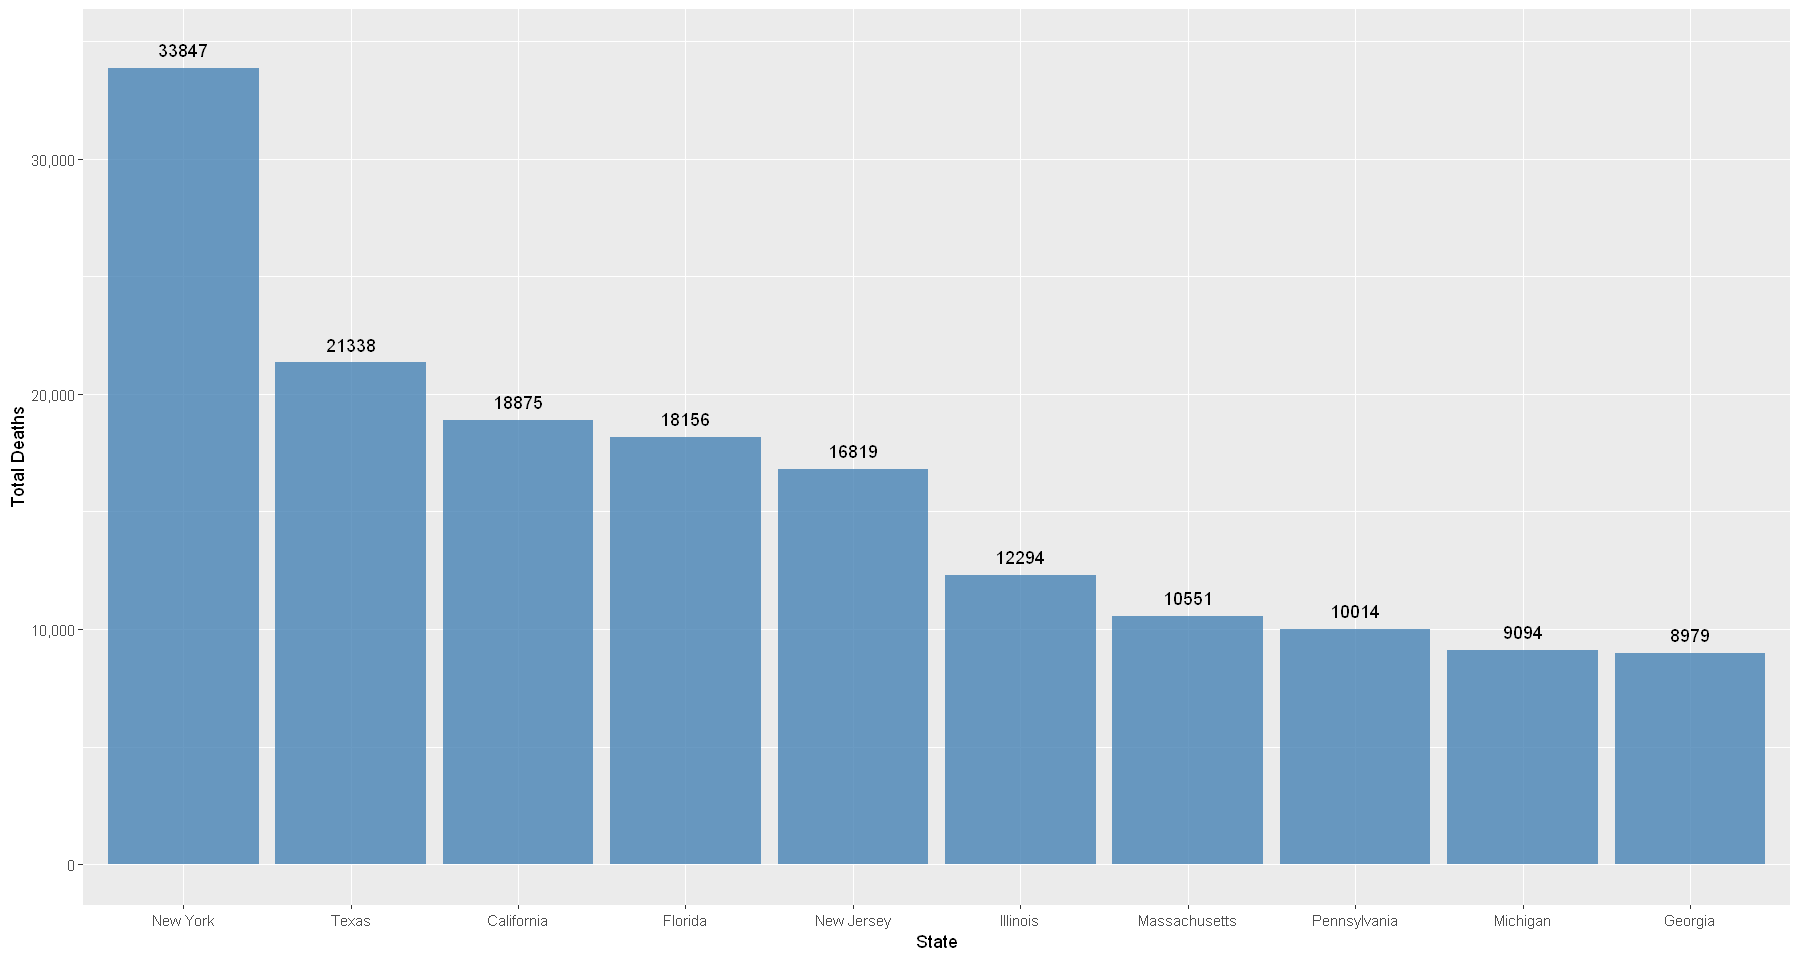

In [15]:
ggplot(data=deaths_per_state_10, aes(x=reorder(state, -total_deaths), y=total_deaths))+geom_bar(fill="steelblue", stat='identity', alpha=0.8)+geom_text(aes(label=total_deaths), nudge_y=800)+labs(y= "Total Deaths", x = "State")+scale_y_continuous(labels = comma)

## Daily new cases

In [16]:
# Cases per day
cases_per_day <- mutate(total_cases, per_day = total_cases - lag(total_cases))
cases_per_day = subset(cases_per_day, select = -c(total_cases))
tail(cases_per_day, 10)

date,per_day
<date>,<int>
2020-11-15,135187
2020-11-16,166544
2020-11-17,161702
2020-11-18,172348
2020-11-19,187440
2020-11-20,198633
2020-11-21,171928
2020-11-22,141034
2020-11-23,179067


Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


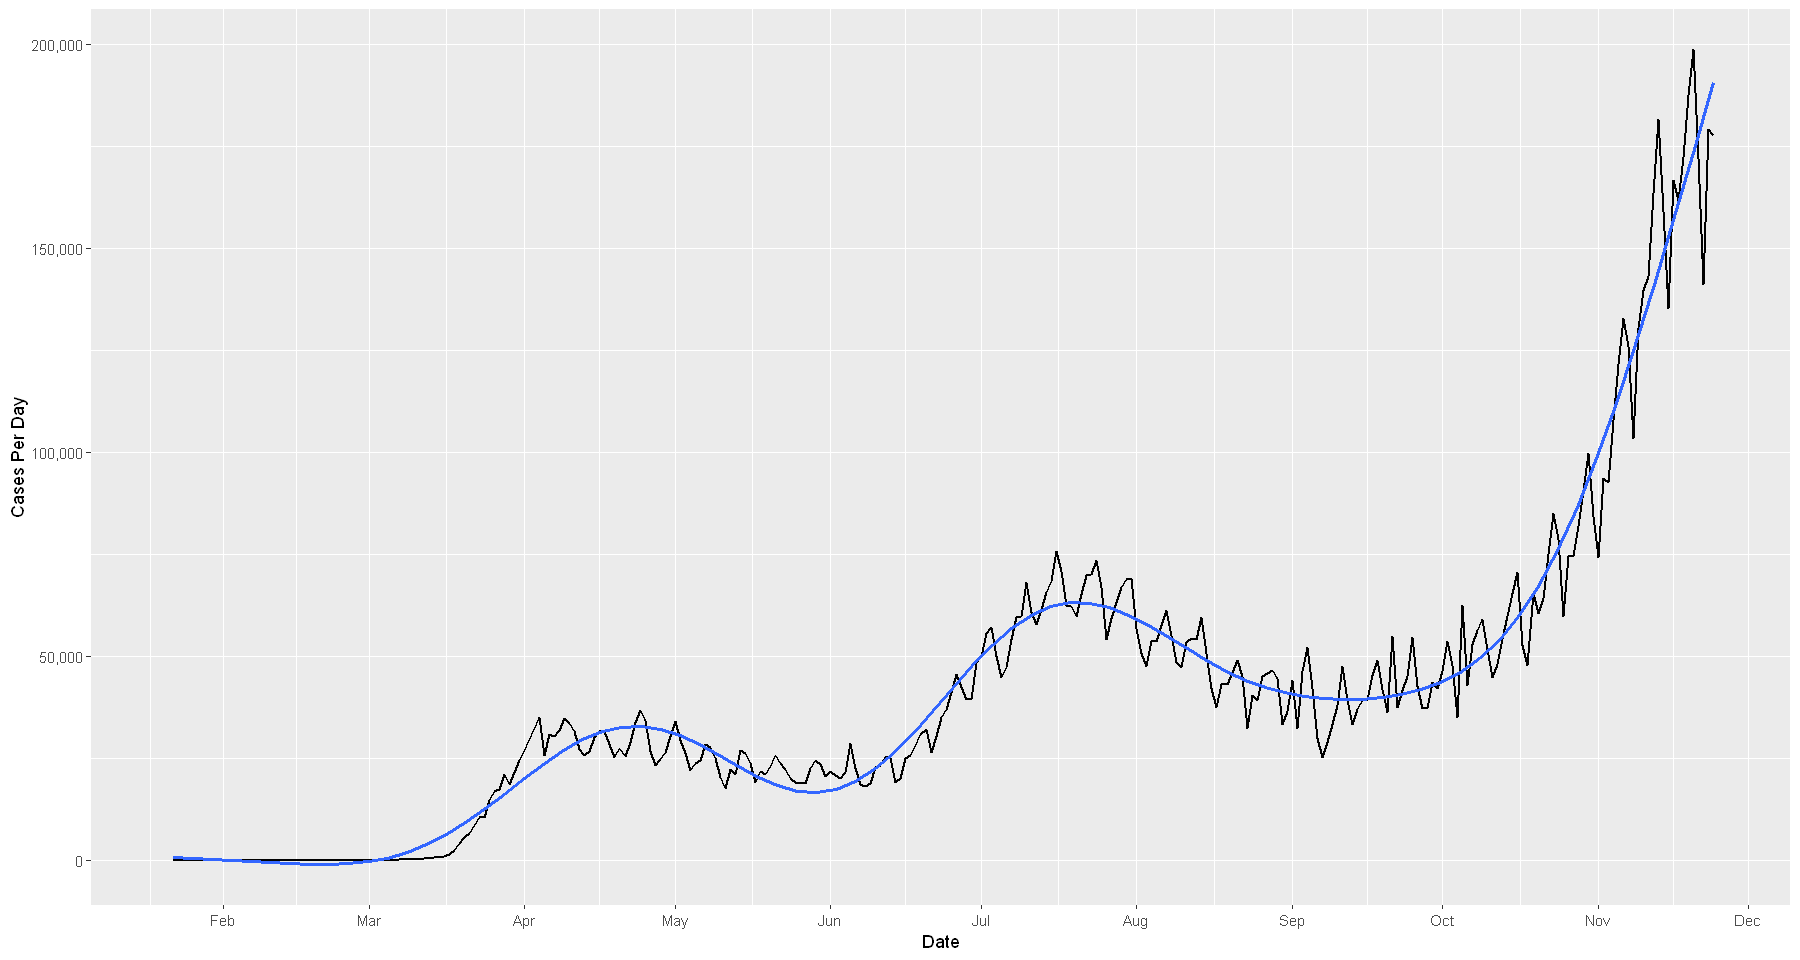

In [17]:
# Cases per day
ggplot(data=cases_per_day, aes(x=date, y=per_day))+geom_line(size=0.75)+geom_smooth(method = "gam", formula = y ~ s(x), se=FALSE)+labs(y= "Cases Per Day", x = "Date")+scale_x_date(date_breaks = "months", date_labels="%b")+scale_y_continuous(labels = comma)

In [18]:
# Most infectious day
filter(cases_per_day, per_day==max(cases_per_day$per_day, na.rm = TRUE))

date,per_day
<date>,<int>
2020-11-20,198633


## Daily new deaths

In [19]:
# deaths per day
deaths_per_day <- mutate(total_deaths, per_day = total_deaths - lag(total_deaths))
deaths_per_day = subset(deaths_per_day, select = -c(total_deaths))
tail(deaths_per_day, 10)

date,per_day
<date>,<int>
2020-11-15,609
2020-11-16,789
2020-11-17,1598
2020-11-18,1905
2020-11-19,1951
2020-11-20,1943
2020-11-21,1408
2020-11-22,838
2020-11-23,1023


Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


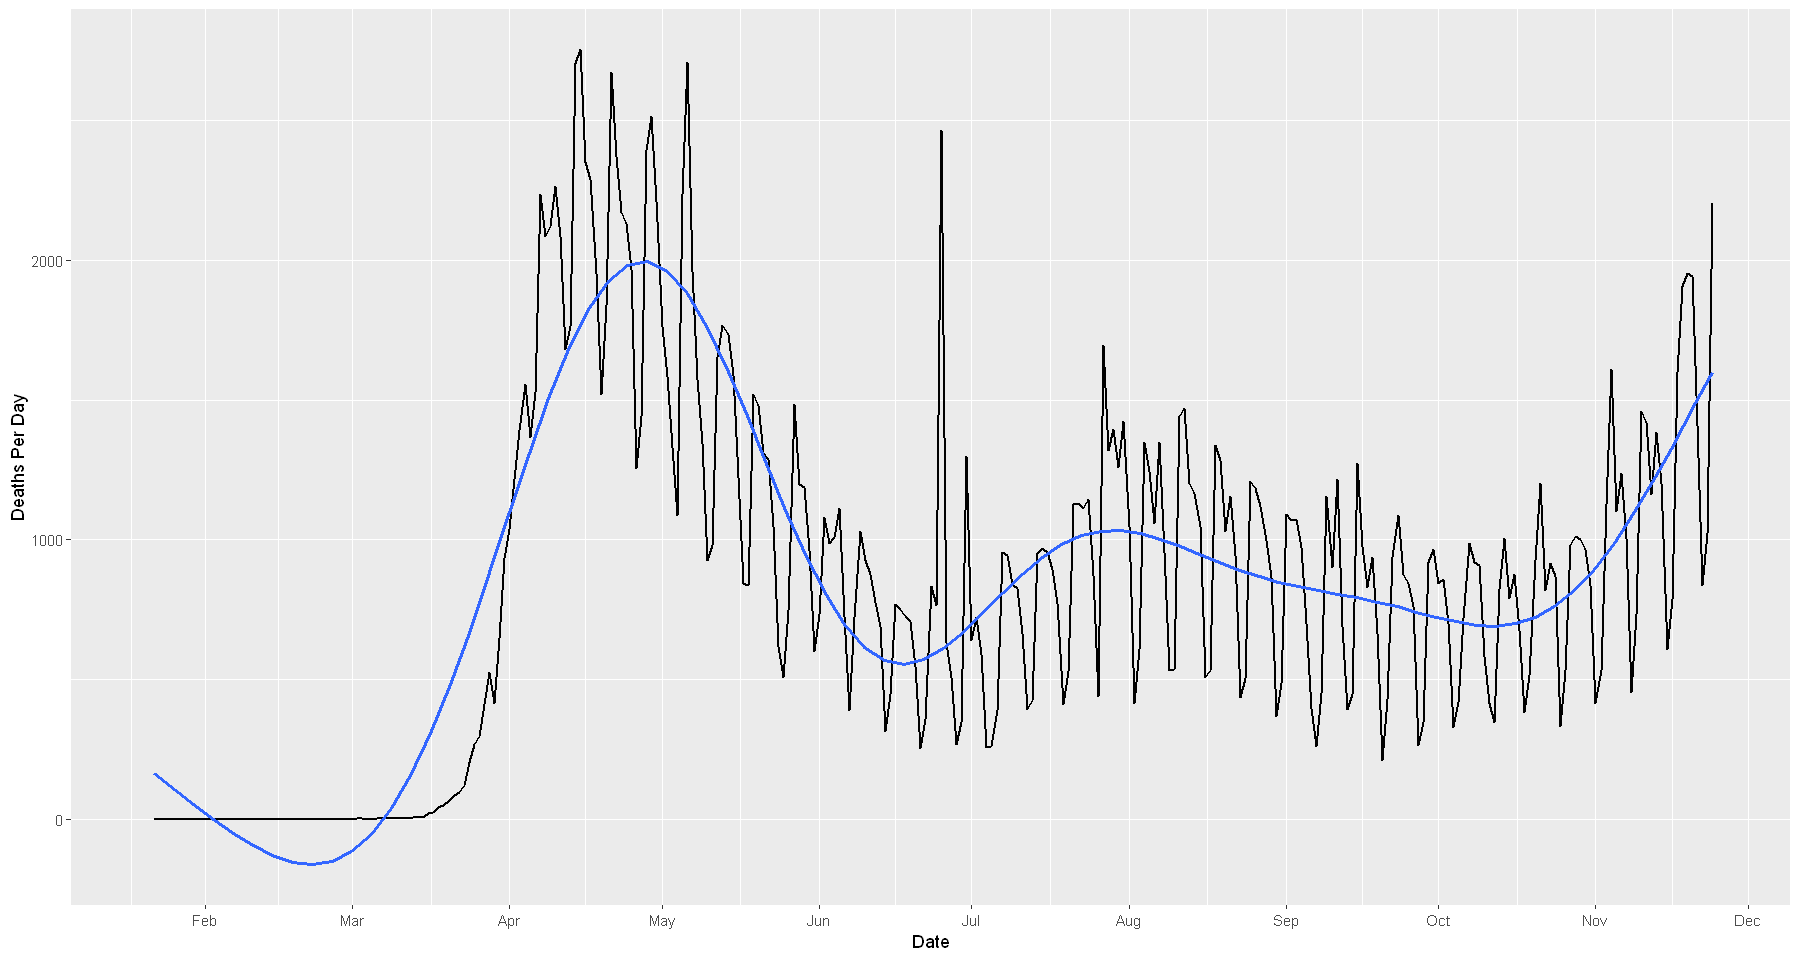

In [20]:
ggplot(data=deaths_per_day, aes(x=date, y=per_day))+geom_line(size=0.75)+geom_smooth(method = "gam", formula = y ~ s(x), se=FALSE)+labs(y= "Deaths Per Day", x = "Date")+scale_x_date(date_breaks = "months", date_labels="%b")

In [21]:
# Deadliest day
filter(deaths_per_day, per_day==max(deaths_per_day$per_day, na.rm=TRUE))

date,per_day
<date>,<int>
2020-04-15,2752


## Mortality rate

In [22]:
# Mortality rate
mortality_rate <- tail(total_deaths$total_deaths,1)/tail(total_cases$total_cases,1)
mortality_rate

[1] 0.02042692

In [23]:
#Mortality rate per state
mortality_rate_per_state <- mutate(cases_per_state, total_deaths=deaths_per_state$total_deaths) %>% 
    arrange(desc(total_cases)) %>% 
    mutate(mortality_rate=total_deaths/total_cases) %>% 
    arrange(desc(mortality_rate))
head(mortality_rate_per_state, 10)

state,total_cases,total_deaths,mortality_rate
<chr>,<int>,<int>,<dbl>
Texas,1204194,33847,0.02810760
Georgia,438441,12294,0.02804026
New York,611756,16819,0.02749299
Wisconsin,386441,10551,0.02730300
Ohio,371908,10014,0.02692601
Illinois,675543,18156,0.02687616
Michigan,347076,9094,0.02620175
North Carolina,343566,8979,0.02613472
Florida,953292,18875,0.01979981


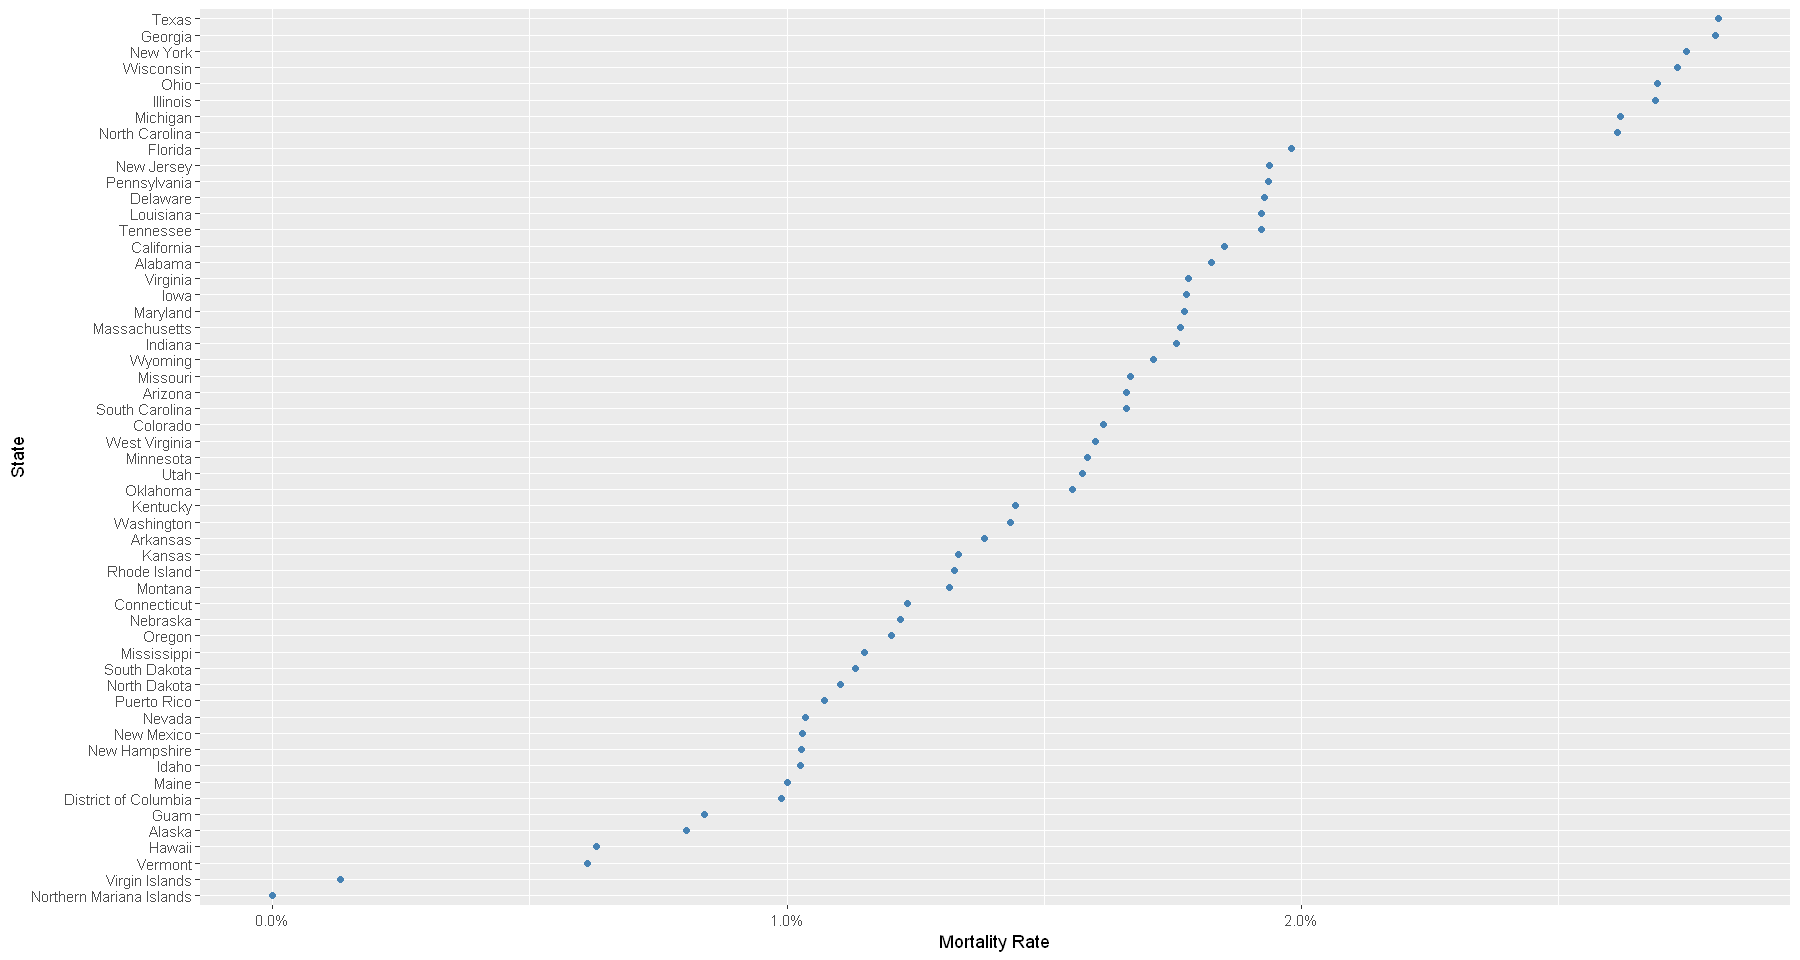

In [24]:
#Mortality rate per state plot
mortality_rate_per_state_plot = subset(mortality_rate_per_state, select = -c(total_cases, total_deaths))
#Plot
ggplot(data=mortality_rate_per_state_plot, aes(x=reorder(state, mortality_rate), y=mortality_rate))+geom_point(color='steelblue')+ coord_flip()+labs(y= "Mortality Rate", x = "State")+scale_y_continuous(labels = percent)

## Mortality rate over time

In [25]:
#Mortality rate over time
mortality_rate_time <- total_cases %>% 
    mutate(total_deaths = total_deaths$total_deaths) %>% 
    mutate(mortality_rate = total_deaths/total_cases)
tail(mortality_rate_time,10)

date,total_cases,total_deaths,mortality_rate
<date>,<int>,<int>,<dbl>
2020-11-15,11113482,245148,0.02205861
2020-11-16,11280026,245937,0.02180288
2020-11-17,11441728,247535,0.02163441
2020-11-18,11614076,249440,0.02147739
2020-11-19,11801516,251391,0.02130159
2020-11-20,12000149,253334,0.02111090
2020-11-21,12172077,254742,0.02092839
2020-11-22,12313111,255580,0.02075674
2020-11-23,12492178,256603,0.02054109


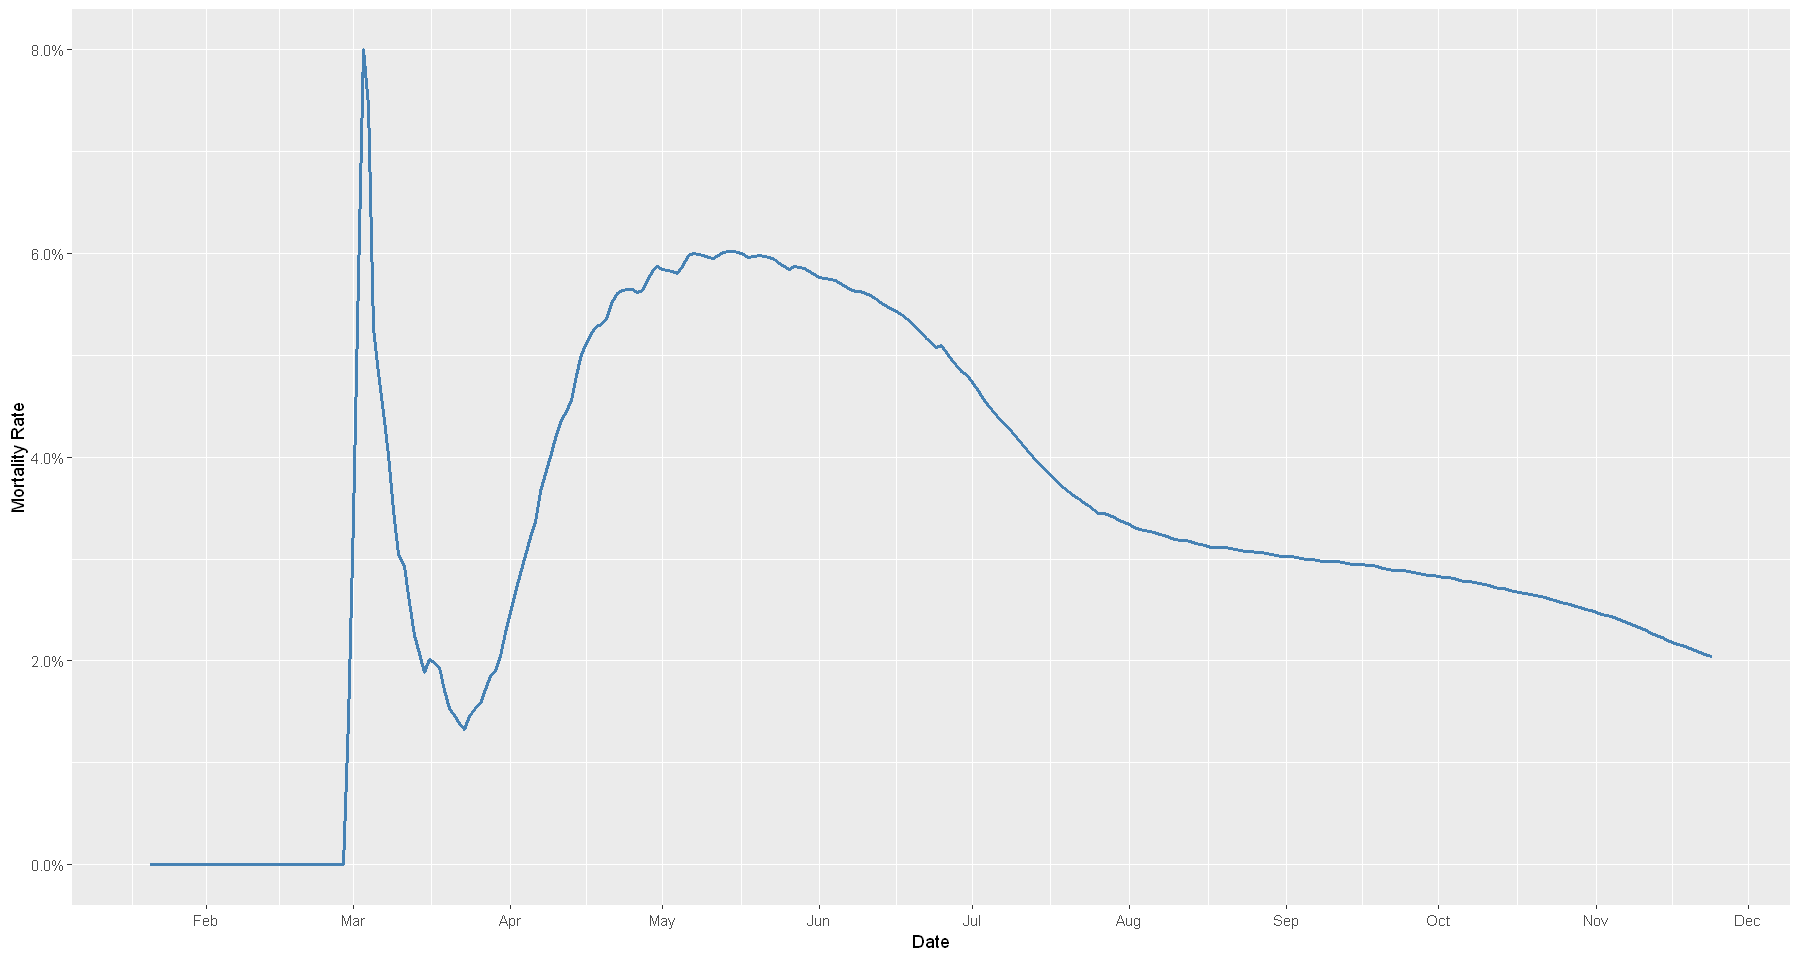

In [26]:
#Mortality rate over time plot
mortality_rate_time_plot = subset(mortality_rate_time, select = -c(total_cases, total_deaths))
ggplot(data=mortality_rate_time_plot, aes(x=date, y=mortality_rate))+geom_line(size=1, color='steelblue')+labs(y= "Mortality Rate", x = "Date")+scale_x_date(date_breaks = "months", date_labels="%b")+scale_y_continuous(labels = percent)